## Задание 1

Для выполнения этого задания требуется сгенерировать `DataFrame` с синтетическими данными. `DataFrame` должен состоять из `10000` строк и `5` колонок. Каждую из колонок мы предлагаем тебе создать и наполнить следующим образом:

* 1-я колонка – `user_id` – идентификатор пользователя. Длина `user_id` должна равняться 15-ти символам. Идентификатор состоит из случайной комбинации следующих символов: `"1234567890abcdefghijk"`. Для каждой строки в `DataFrame` значение `user_id` формируются случайным образом.

* 2-я колонка – `order_number` – номер заказа. Столбец необходимо заполнить случайными значениями в диапазоне от `1` до `10`.

* 3-я колонка – `click2delivery` – время, прошедшее с момента оформления заказа до вручения клиенту. Столбец необходимо заполнить случайными значениями из нормального распределения со средним `1440` и стандартным отклонением `200`.

* 4-я колонка – `order_items_sum` – общая стоимость заказа. Значения для этого столбца необходимо взять из экспоненциального распределения с параметром `λ = 1`, смещённого на `+1`.

* 5-я колонка – `retention` – день жизни покупателя, в который он совершил заказ. Необходимо сгенерировать значения `1, 2, 3, 4, 5` с вероятностями `0.35, 0.25, 0.2, 0.15` и `0.05` соответственно.

В случае, если в колонке `user_id` встречаются дублирующиеся значения, оставь только первое из них.

In [ ]:
import pandas as pd
import numpy as np
import random as rd
import string as st

In [ ]:
# Словарь, где будут хранится значения столбцов
dict_ = {}

In [ ]:
# Создадим значения столбца user_id
list_users = []
for num in range(10000):
  list_ = []
  for i in range(15):
    a = rd.choice(['1','2','3','4','5','6','7','8','9','0','a','b','c','d','e','f','g','h','i','j','k'])
    list_.append(a)
  list_users.append(''.join(list_))

In [ ]:
# Создадим значения столбца order_number
list_order = []
for num in range(10000):
  a = rd.randint(1,10)
  list_order.append(a)

In [ ]:
# Создадим значения столбца click2delivery
list_normal = []
for num in range(10000):
  a = np.random.normal(1440, 200)
  list_normal.append(a)

In [ ]:
# Создадим значения столбца order_items_sum
list_sum = []
for num in range(10000):
  a = np.random.exponential(10000)
  list_sum.append(a)

In [ ]:
# Создадим значения столбца retention
list_retention = []
for num in range(10000):
  a = rd.choices([1, 2, 3, 4, 5], weights=[0.35, 0.25, 0.2, 0.15, 0.05])
  list_retention.append(a[0])

In [ ]:
dict_ = {'user_id': list_users, 'order_number': list_order, 'click2delivery': list_normal, 'order_items_sum': list_sum, 'retention': list_retention}

In [ ]:
# Создадим DataFrame с полученными данными
df_ozon = pd.DataFrame(dict_)

In [ ]:
df_ozon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          10000 non-null  object 
 1   order_number     10000 non-null  int64  
 2   click2delivery   10000 non-null  float64
 3   order_items_sum  10000 non-null  float64
 4   retention        10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


In [ ]:
# Проверим уникально user_id
df_ozon['user_id'].nunique()

10000

Повторений нет

## Задание 2

Для всех строк исходного датасета, сгруппированных по номеру заказа, посчитать среднее значение времени доставки по группе. Результат необходимо добавить в новый столбец датафрейма.

In [ ]:
# Создадим отдельный датасет
df_mean = df_ozon[['order_number','click2delivery']]

In [ ]:
# Сгруппируем
df_mean = df_mean.groupby('order_number').mean()

In [ ]:
list_mean_delivery = []

for i in df_ozon['order_number']:
  if i in [x for x in df_mean.index]:
    a = df_mean['click2delivery'].loc[i]
    list_mean_delivery.append(a)

df_ozon['click_mean_delivery'] = list_mean_delivery

In [ ]:
df_mean.head()

,click2delivery
order_number,
1,1448.408336
2,1429.482792
3,1442.517416
4,1432.816226
5,1430.290182


In [ ]:
df_ozon.head()

,user_id,order_number,click2delivery,order_items_sum,retention,click_mean_delivery
0,8008kdc5b6h863d,10,1219.570358,6463.217485,2,1440.827345
1,he16ccfc1909c7c,8,1370.235584,8537.972552,1,1439.509651
2,8776dkj03a41183,8,1640.232545,35370.273723,1,1439.509651
3,g3k4084bd55k684,8,1400.590537,29561.830549,5,1439.509651
4,fa317399fg01975,3,1965.837195,6058.801620,1,1442.517416


## Задание 3

Отдельной колонкой добавить значения последовательности, начинающейся с `0` и `1`, где каждый следующий элемент является суммой двух предыдущих, умноженных на `0.5`.

In [21]:
# Создадим список значений для нового столбца
list_for = [0,1]
for i in range(10000-len(list_for)):
  list_for.append((list_for[-1]+list_for[-2])*0.5)

df_ozon['sequence'] = list_for

In [23]:
df_ozon.head()

,user_id,order_number,click2delivery,order_items_sum,retention,click_mean_delivery,sequence
0,8008kdc5b6h863d,10,1219.570358,6463.217485,2,1440.827345,0.000
1,he16ccfc1909c7c,8,1370.235584,8537.972552,1,1439.509651,1.000
2,8776dkj03a41183,8,1640.232545,35370.273723,1,1439.509651,0.500
3,g3k4084bd55k684,8,1400.590537,29561.830549,5,1439.509651,0.750
4,fa317399fg01975,3,1965.837195,6058.801620,1,1442.517416,0.625


## Задание 4

Напиши функцию, которая принимает на вход значение `user_id` и возвращает строку следующего вида: все буквы в той последовательности, в которой они встречаются в `user_id`, затем квадрат числа, полученного из всех цифр в `user_id` в той последовательности, в которой они встречаются в `user_id`.

Добавь результат применения этой функции к `user_id` в новый столбец. Использование циклов вне функции запрещено.

In [88]:
# Создадим функцию
def mult(x):
  digits = ''.join(filter(str.isdigit, x))
  letters = ''.join(filter(str.isalpha, x))

  return f"{letters}{int(digits)**2}"

In [92]:
# Занесем данные в новый столбец
df_ozon['mult'] = df_ozon['user_id'].apply(mult)

In [93]:
# Посмотрим полученный результат
df_ozon.head()

,user_id,order_number,click2delivery,order_items_sum,retention,click_mean_delivery,sequence,mult
0,8008kdc5b6h863d,10,1219.570358,6463.217485,2,1440.827345,0.000,kdcbhd641371715014200769
1,he16ccfc1909c7c,8,1370.235584,8537.972552,1,1439.509651,1.000,heccfccc2621475095409
2,8776dkj03a41183,8,1640.232545,35370.273723,1,1439.509651,0.500,dkja7701877484556565839489
3,g3k4084bd55k684,8,1400.590537,29561.830549,5,1439.509651,0.750,gkbdk11617570149791907856
4,fa317399fg01975,3,1965.837195,6058.801620,1,1442.517416,0.625,fafg1007421377382608900625


## Задание 5

Вычисли моду, медиану, среднее, дисперсию и стандартное отклонение для столбцов
`click2delivery`, `order_items_sum` и `retention`. Построй гистограммы распределения значений в столбцах.

In [94]:
import matplotlib.pyplot as plt
import seaborn as sb

In [106]:
# Создадим датасет для расчетов
df_mod = df_ozon[['click2delivery', 'order_items_sum', 'retention']]

In [127]:
# Получим результат mode(), std(), mean(), median()
mode = (
    df_mod
    .mode()
    .head(1)
    .set_index(pd.Index(['mode']))
)

describe = (
    df_mod
    .describe()
    .loc[['mean', 'std', '50%']]
)

result = pd.concat([mode, describe])

In [133]:
# Посчитаем дисперсию
df_dis = pd.DataFrame(index=['dispers'])

for name in df_mod.columns:
  mean_ = df_mod[name].mean()
  a = (sum(list(map(lambda x: x -mean_, df_mod[name])))/len(df_mod[name]))**2
  df_dis[name] = a

In [135]:
result = pd.concat([result, df_dis])
result

,click2delivery,order_items_sum,retention
mode,6.773382e+02,1.516908e+00,1.000000e+00
mean,1.440613e+03,9.979267e+03,2.326700e+00
std,2.002759e+02,9.946327e+03,1.234471e+00
50%,1.439588e+03,6.864445e+03,2.000000e+00
dispers,4.140504e-29,9.544884e-25,2.349260e-30


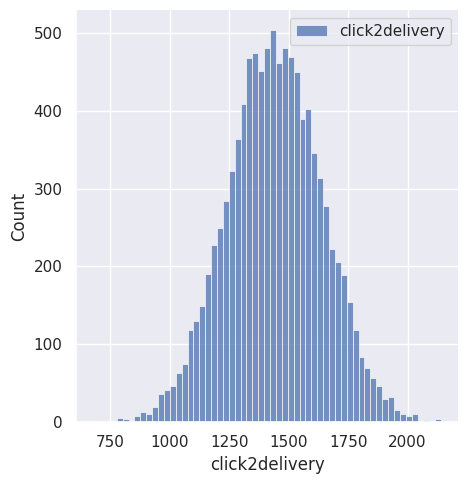

In [153]:
# Построим график
sb.set_theme()
sb.displot(df_mod['click2delivery'], label='click2delivery')
plt.legend()

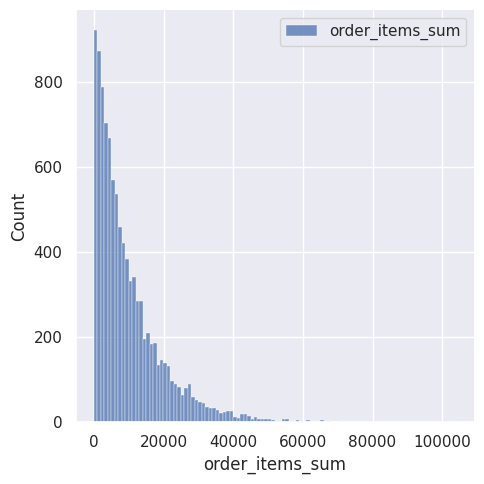

In [154]:
sb.displot(df_mod['order_items_sum'], label='order_items_sum')
plt.legend()

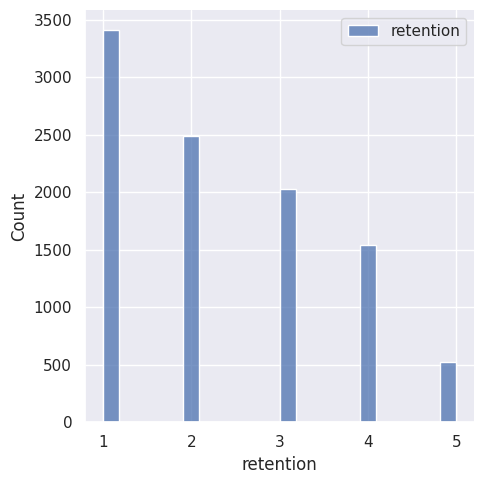

In [155]:
sb.displot(df_mod['retention'], label='retention')
plt.legend()

## Задание 6

Построй график, который наиболее полно, на твой взгляд, описывает зависимость времени доставки заказа от его номера. Обоснуй, почему ты так считаешь?

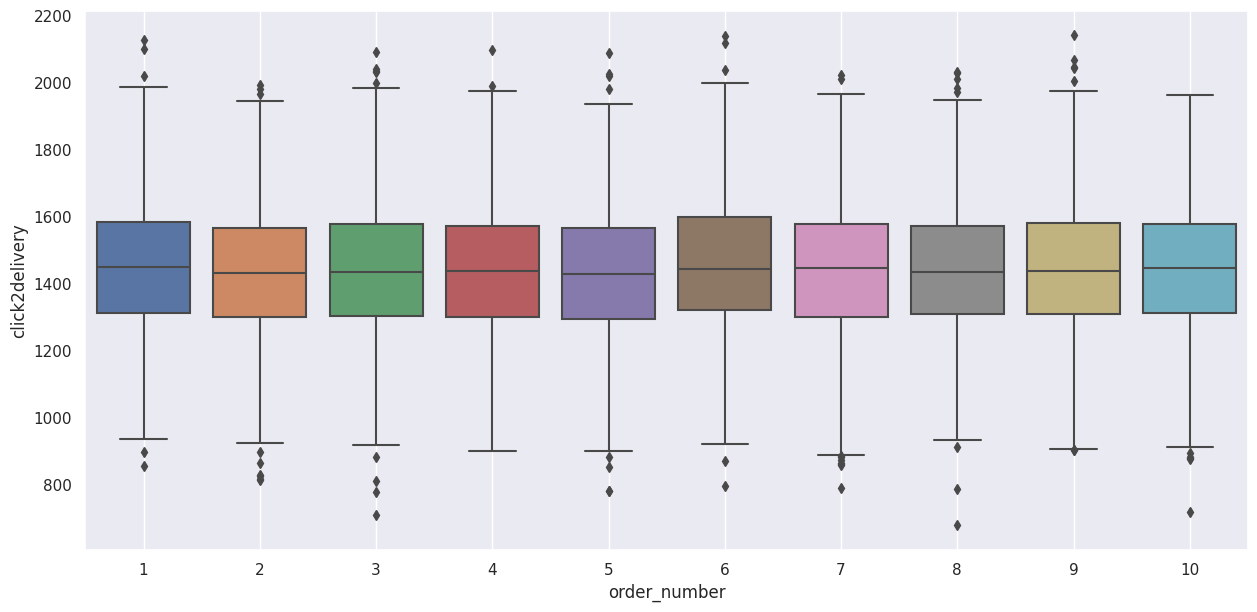

In [180]:
plt.figure(figsize=(15,7))
sb.boxplot(data=df_ozon[['click2delivery', 'order_number']], x='order_number', y='click2delivery')
plt.grid()
plt.show()